In [1]:
import keras
import numpy as np
import PIL.ImageOps
import matplotlib.pyplot as plt

from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

2024-12-14 11:31:17.705414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734197477.786016  128211 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734197477.809709  128211 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 11:31:17.997490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)
(60000,)


In [2]:
# 2. Preprocesamiento de los datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Binarizamos las clases
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

X_train /= 255
X_test /= 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# 3. Creacion del modelo
epochs = 10
batch_size = 128
num_classes = 10

model = Sequential()
model.add(keras.Input(shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

I0000 00:00:1734197488.432551  128211 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1572 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
# 4. Entrenamiento del modelo
hist = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))
print("El modelo se ha entrenado correctamente")

model.save('mnist_model.keras')
print("Guardando el modelo como mnist_model.keras")

2024-12-14 11:31:32.547051: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-12-14 11:31:33.030785: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1734197495.399656  128443 service.cc:148] XLA service 0x7e615000c670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734197495.400397  128443 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-14 11:31:35.493692: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734197495.785112  128443 cuda_dnn.cc:529] Loaded cuDNN version 90501


 13/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3594 - loss: 1.8366

I0000 00:00:1734197502.628458  128443 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8684 - loss: 0.4114

2024-12-14 11:31:53.111349: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-12-14 11:31:53.175522: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8686 - loss: 0.4110 - val_accuracy: 0.9848 - val_loss: 0.0441
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9871 - val_loss: 0.0403
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9858 - loss: 0.0471 - val_accuracy: 0.9881 - val_loss: 0.0359
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9886 - loss: 0.0375 - val_accuracy: 0.9899 - val_loss: 0.0295
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9902 - val_loss: 0.0276
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9917 - val_loss: 0.0257
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9906 - val_loss: 0.0307
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9

In [5]:
# 5. Evaluacion del modelo
score = model.evaluate(X_train, y_train, verbose = 0)

print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

2024-12-14 11:33:19.832030: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Train loss: 0.003145140130072832
Train accuracy: 0.9990833401679993
Test loss: 0.026248076930642128
Test accuracy: 0.9932000041007996


In [6]:
def predict_digit(img):
    # Redimensiona la imagen a 28x28 pixels
    img = img.resize((28, 28))
    
    # Convierte la imagen rgb a escala de grises
    img = img.convert('L')
    img = np.array(img)

    # Redimensiona la imagen de acuerdo con la entrada del modelo
    img = img.reshape(1, 28, 28, 1)
    img = img/255.0

    # Predice la clase
    res = model.predict([img])[0]
    
    return np.argmax(res), max(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Digito:  3
ACC:  0.43325755%


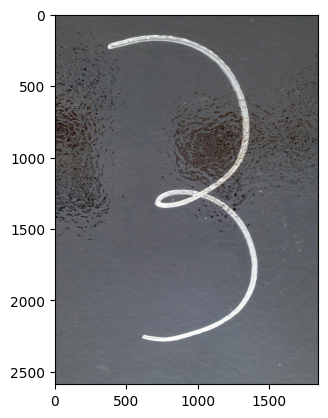

In [8]:
# Importa el modulo PIL

img = PIL.ImageOps.invert(Image.open(r"./datasets/Imagenes_curso/digito_tres.jpg"))

digit, acc = predict_digit(img)

print("Digito: ", digit)
print("ACC: ", str(acc) + "%")

plt.figure()
plt.imshow(img, cmap= 'gray')
plt.show()